#### Dane - pliki csv

Instalacja pakietów *CSV* i *DataFrames*, służących do odczytywania danych w formacie CSV do ramki danych Julia oraz do pracy z tablicami i ramkami danych.

In [ ]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")

Opcjonalnie - sprawdzenie czy wszystkie pakiety są zaktualizowane.

In [ ]:
Pkg.update()

**Import danych**

Wczytanie danych ze źródła https://www.kaggle.com/datasets/saurabh00007/iriscsv.

Zbiór danych dotyczy kilku rodzajów irysów. Każdy irys jest opisany za pomocą 4 cech (długość i szerokość kielicha, długość i szerokość płatka).

In [158]:
using CSV, DataFrames

path = "./data/Iris.csv"

# Odczytanie danych ze źródła w formie ramki danych Julia za pomocą funkcji CSV()
iris = CSV.read(path, DataFrame)

Row,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,Int64,Float64,Float64,Float64,Float64,String15
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,5.0,3.6,1.4,0.2,Iris-setosa
6,6,5.4,3.9,1.7,0.4,Iris-setosa
7,7,4.6,3.4,1.4,0.3,Iris-setosa
8,8,5.0,3.4,1.5,0.2,Iris-setosa
9,9,4.4,2.9,1.4,0.2,Iris-setosa


#### EDA

Usunięcie kolumny *ID*.

In [159]:
select!(iris, Not(1))

Row,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,Float64,Float64,Float64,Float64,String15
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


Funkcja *first() / last()* - wyświetlenie pierwszych/ostatnich kilku wierszy.

In [160]:
first(iris, 5)
#last(iris, 5)

Row,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,Float64,Float64,Float64,Float64,String15
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


Funkcja *names()* - wyświetlenie nazw kolumn.

In [161]:
names(iris)

5-element Vector{String}:
 "SepalLengthCm"
 "SepalWidthCm"
 "PetalLengthCm"
 "PetalWidthCm"
 "Species"

Funkcja *eltype()* - wyświetlanie typów kolumn.

In [162]:
eltype.(eachcol(iris))

5-element Vector{DataType}:
 Float64
 Float64
 Float64
 Float64
 String15

Funkcja *size()* - wyświetlenie rozmiaru ramki danych.

In [163]:
size(iris)

(150, 5)

Funkcja *describe()* - wyświetlenie podstawowych statystyk i informacji o brakach danych.

In [164]:
describe(iris)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,SepalLengthCm,5.84333,4.3,5.8,7.9,0,Float64
2,SepalWidthCm,3.054,2.0,3.0,4.4,0,Float64
3,PetalLengthCm,3.75867,1.0,4.35,6.9,0,Float64
4,PetalWidthCm,1.19867,0.1,1.3,2.5,0,Float64
5,Species,,Iris-setosa,,Iris-virginica,0,String15


Wyświetlenie informacji o unikalnych wartościach wybranej kolumny.

In [165]:
unique(iris[:, "Species"])

3-element Vector{String15}:
 "Iris-setosa"
 "Iris-versicolor"
 "Iris-virginica"

Wizualizacja wybranych danych.

In [ ]:
Pkg.add("Plots")

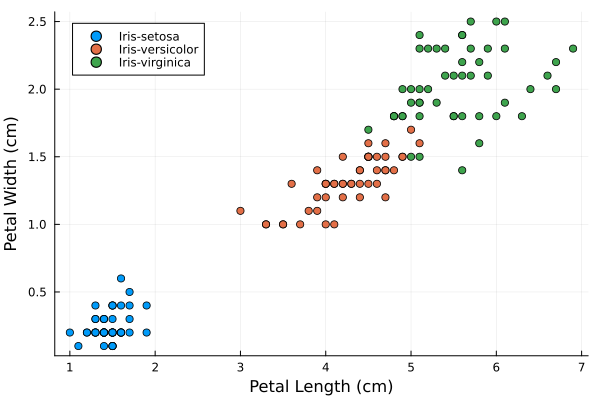

In [166]:
using Plots

scatter(
    iris.PetalLengthCm, iris.PetalWidthCm, 
    group = iris.Species,
    legend = true
)
xlabel!("Petal Length (cm)")
ylabel!("Petal Width (cm)")

### Grupowanie

https://juliapackages.com/p/clustering

In [ ]:
Pkg.add("Clustering")

Wyodrębnienie cech.

In [170]:
features = Matrix(iris[:, 1:4])' # Macierz transponowana z kolumnami 1-4

4×150 adjoint(::Matrix{Float64}) with eltype Float64:
 5.1  4.9  4.7  4.6  5.0  5.4  4.6  5.0  …  6.8  6.7  6.7  6.3  6.5  6.2  5.9
 3.5  3.0  3.2  3.1  3.6  3.9  3.4  3.4     3.2  3.3  3.0  2.5  3.0  3.4  3.0
 1.4  1.4  1.3  1.5  1.4  1.7  1.4  1.5     5.9  5.7  5.2  5.0  5.2  5.4  5.1
 0.2  0.2  0.2  0.2  0.2  0.4  0.3  0.2     2.3  2.5  2.3  1.9  2.0  2.3  1.8

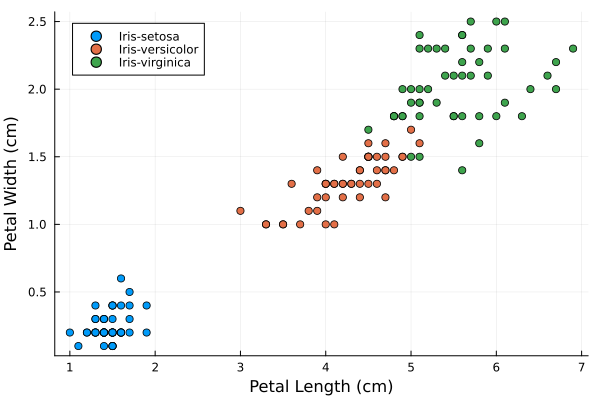

In [171]:
scatter(
    iris.PetalLengthCm, iris.PetalWidthCm, 
    group = iris.Species,
    legend = true
)
xlabel!("Petal Length (cm)")
ylabel!("Petal Width (cm)")

#### K-means

Elbow method

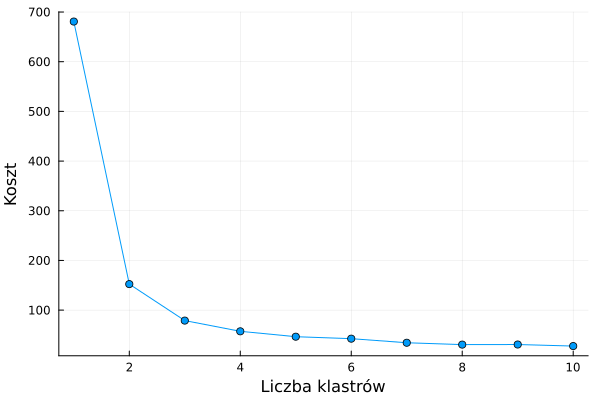

In [172]:
function calculate_cost(data, k)
    kmeans_model = kmeans(features, k)
    return kmeans_model, kmeans_model.totalcost
end

data = train_data[:, 1:4]
cost_array = Float64[]

for k in 1:10
    _, cost = calculate_cost(data, k)
    push!(cost_array, cost)
end

plot(
    1:10,
    cost_array,
    xlabel = "Liczba klastrów",
    ylabel = "Koszt",
    marker = :circle,
    legend = false
)

In [173]:
kmeans_model = kmeans(features, 3) # Dane wejściowe - macierz transponowana z kolumnami 1-4 ze zbioru treningowego

# Zapisanie wyników w oryginalnej ramce danych w kolumnie KMeansLabels
iris.KMeansLabels = assignments(kmeans_model)

150-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 2
 3
 2
 2
 2
 3
 2
 2
 3

#### DBSCAN

Pierwszy parametr to *epsilon* - określa on maksymalny dystans pomiędzy dwoma punktami, aby zostały one uznane za sąsiadów. Punkty znajdujące się w tej odległości uważane są za należące do tego samego sąsiedztwa/klastra. Im mniejsza wartość *epsilon*, tym więcej klastrów uzyskamy, a także większa ilość punktów zostanie uznana za szum. Większa wartość może prowadzić do scalania klastrów.

Parametr *min_neighbors* oznacza minimalną liczbę sąsiadów w promieniu *epsilon*, która jest wymagana, aby punkt został uznany za centralny. Jeśli liczba punktów w otoczeniu danego punktu jest mniejsza niż *min_neighbors*, punkt ten uznany będzie za punkt szumowy.

Parametr *min_cluster_size* określa minimalną liczbę punktów w klastrze. Podobnie jak poprzednio, jeśli liczba punktów będzie niższa, klaster zostanie uznany za szum.

In [175]:
dbscan_model = dbscan(
    features,
    0.7,
    min_neighbors = 10,
    min_cluster_size = 20
)

# Zapisanie wyników w oryginalnej ramce danych w kolumnie KMeansLabels
iris.DBSCANLabels = dbscan_model.assignments

150-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 2
 2
 2
 2
 2
 2
 2
 2
 2

### Ewaluacja modeli

Wizualizacja wyników.

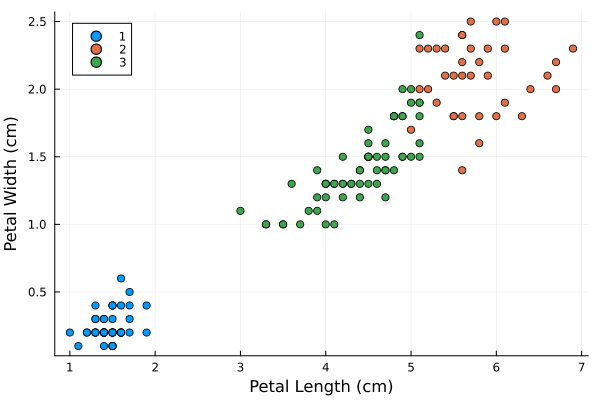

In [174]:
scatter(
    iris.PetalLengthCm, iris.PetalWidthCm,
    group = iris.KMeansLabels,
    legend = true
)
xlabel!("Petal Length (cm)")
ylabel!("Petal Width (cm)")

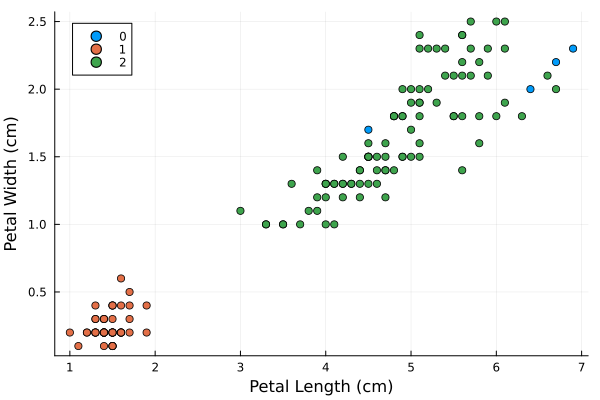

In [176]:
scatter(
    iris.PetalLengthCm, iris.PetalWidthCm,
    group = iris.DBSCANLabels,
    legend = true
)
xlabel!("Petal Length (cm)")
ylabel!("Petal Width (cm)")

**K-means** - wielkości klastrów.

In [177]:
n_clusters = length(unique(kmeans_model.assignments))
cluster_sizes = [sum(kmeans_model.assignments .== i) for i in 1:n_clusters]

println("Rozmiary klastrów: $cluster_sizes")

Rozmiary klastrów: [50, 38, 62]


**DBSCAN** - liczba klastrów, wielkości klastrów, liczba punktów szumowych.

In [178]:
n_clusters = length(unique(dbscan_model.assignments)) - 1  # Bez uwzględnienia szumu
cluster_sizes = [sum(dbscan_model.assignments .== i) for i in 1:n_clusters]
noise_points = sum(dbscan_model.assignments .== 0)

println("Liczba klastrów $n_clusters")
println("Rozmiary klastrów: $cluster_sizes")
println("Liczba punktów szumu: $noise_points")

Liczba klastrów 2
Rozmiary klastrów: [50, 96]
Liczba punktów szumu: 4


**Silhouette score**

In [179]:
function calculate_mean_silhouette(labels, distances)
    n = length(labels)
    
    # Średnie odległości w obrębie każdego klastra
    mean_distances = [mean(distances[i, labels .== labels[i]]) for i in 1:n]

    # Silhouette score dla każdego punktu
    silhouette_vals = [
        (mean_distances[i] - minimum(mean_distances[labels .!= labels[i]])) /
        max(mean_distances[i], minimum(mean_distances[labels .!= labels[i]]))
        for i in 1:n
    ]

    mean_silhouette = mean(silhouette_vals)
    mean_silhouette = round(mean_silhouette, digits = 2)
    
    return mean_silhouette
end

calculate_mean_silhouette (generic function with 1 method)

In [180]:
using Distances, Statistics

kmeans_labels = iris.KMeansLabels
distances = pairwise(Euclidean(), features)
mean_silhouette = calculate_mean_silhouette(kmeans_labels, distances)
println("Wskaźnik silhouette dla K-means: $mean_silhouette")

Wskaźnik silhouette dla K-means: 0.31


In [181]:
dbscan_labels = iris.DBSCANLabels
distances = pairwise(Euclidean(), features)
mean_silhouette = calculate_mean_silhouette(dbscan_labels, distances)
println("Wskaźnik silhouette dla DBSCAN: $mean_silhouette")

Wskaźnik silhouette dla DBSCAN: 0.32
